In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('netflix_titles.csv')

In [22]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [24]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [25]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
8802,False
8803,False
8804,False
8805,False


In [26]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [27]:
df.shape

(8807, 12)

### for duplicates


In [28]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [29]:
df[df.duplicated()] ## looks clean

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [30]:
df.drop_duplicates(inplace = True) # If there were any duplicate

### Null values

In [31]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


<Axes: >

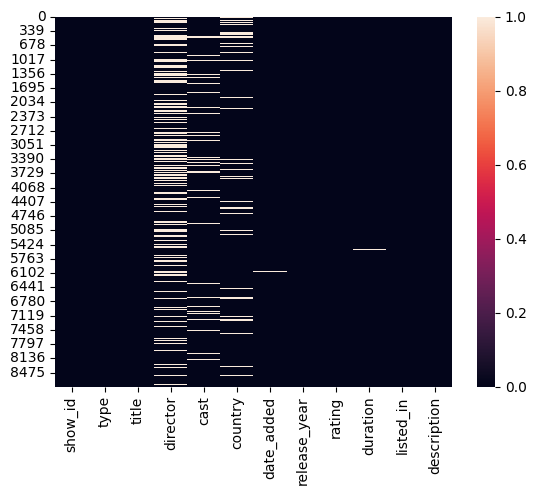

In [33]:
## Heatmap
sns.heatmap(df.isnull())

### q1. For 'House of Cards', what is the show id and who is the director of this show?

In [34]:
df[df['title'].isin(['House of Cards'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [35]:
# can you str.contains()
df[df['title'].str.contains('House of Cards')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


### Q2. In which year highest number of the TV shows & Movies were released ? Show with Bar Graph

In [36]:
# to_datetime
df['Date_N'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

In [37]:
df['year'] = df['Date_N'].dt.year

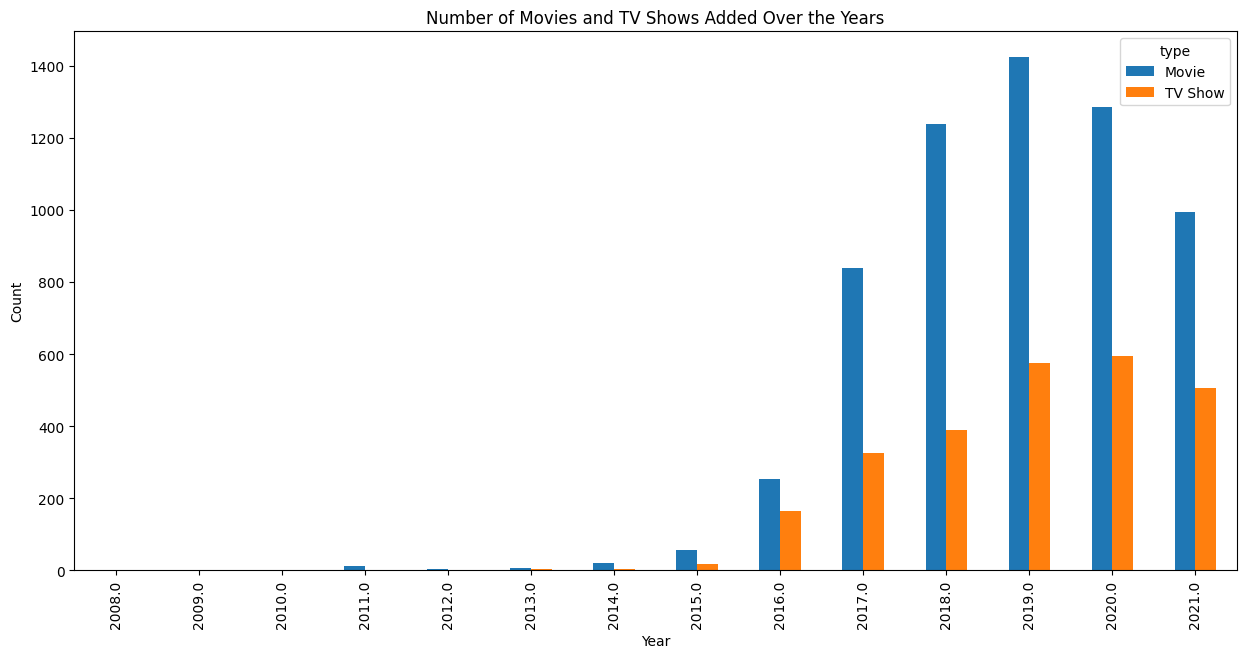

In [38]:
# Count the number of movies and TV shows for each year
year_counts = df.groupby(['year', 'type']).size().unstack(fill_value=0)

# Plotting the bar graph
year_counts.plot(kind='bar', figsize=(15, 7))
plt.title('Number of Movies and TV Shows Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Q.3. How many Movies & TV Shows are in the dataset? Show with Bar Graph

In [39]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,2021.0


In [41]:
df.groupby('type').type.count()

,type
type,
Movie,6131
TV Show,2676


<Axes: xlabel='count', ylabel='type'>

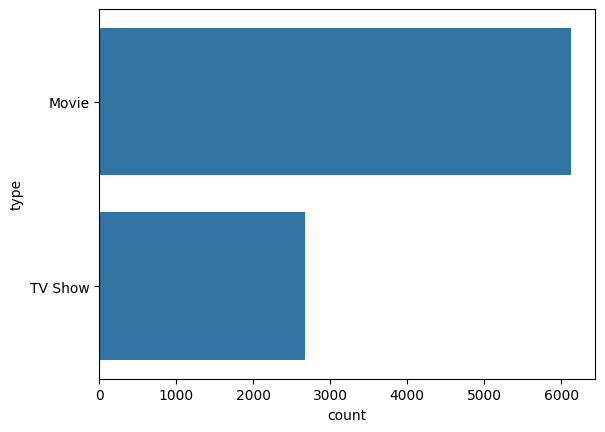

In [42]:
sns.countplot(df['type'])